In [4]:
# import training and testing functions from model.py
# the model is imported then from mode.py
from mode import *
from inspect_data import *
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os

low resolution images : 
shapes :  [[384 384   3]]
all_of_same_shape :  True
high resolution images : 
shapes :  [[384 384   3]]
all_of_same_shape :  True


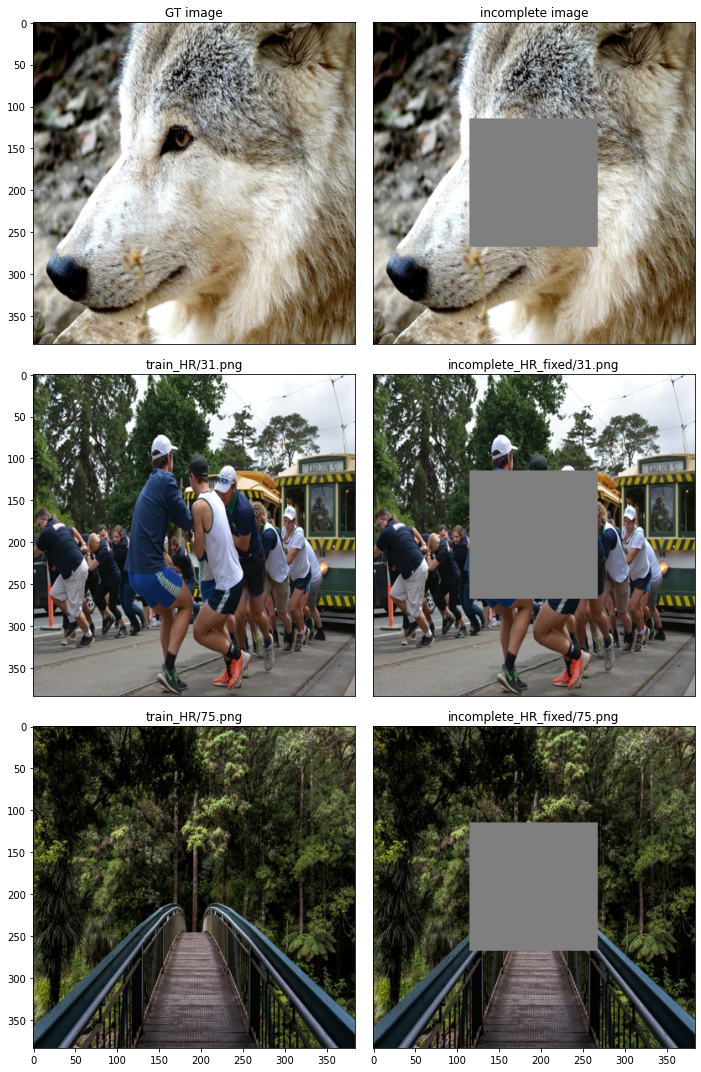

In [25]:
# inspect the dataset
inspect_data(HR_path = 'train_data/realistic_nature_100/train_HR/',
             LR_path = 'train_data/realistic_nature_100/incomplete_HR_fixed/',
             type_end = '.png',
             sample_images = 3)

low resolution images : 
shapes :  [[384 384   3]]
all_of_same_shape :  True
high resolution images : 
shapes :  [[384 384   3]]
all_of_same_shape :  True


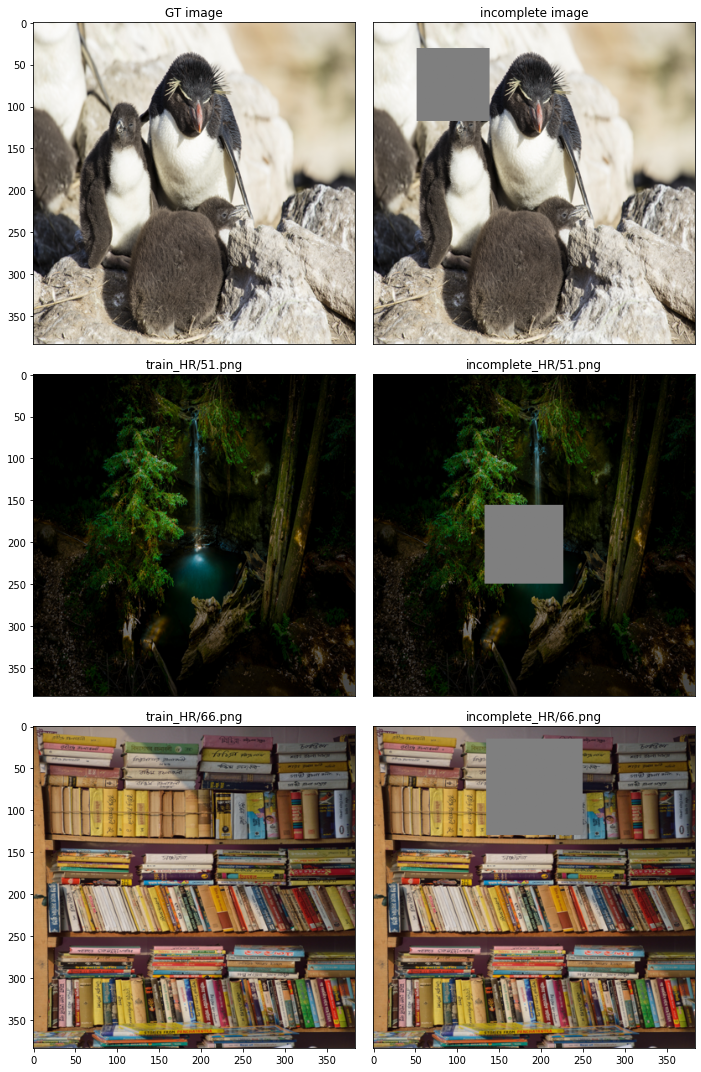

In [26]:
# inspect the dataset
inspect_data(HR_path = 'train_data/realistic_nature_100/train_HR/',
             LR_path = 'train_data/realistic_nature_100/incomplete_HR/',
             type_end = '.png',
             sample_images = 3)

low resolution images : 
shapes :  [[384 384   3]]
all_of_same_shape :  True
high resolution images : 
shapes :  [[384 384   3]]
all_of_same_shape :  True


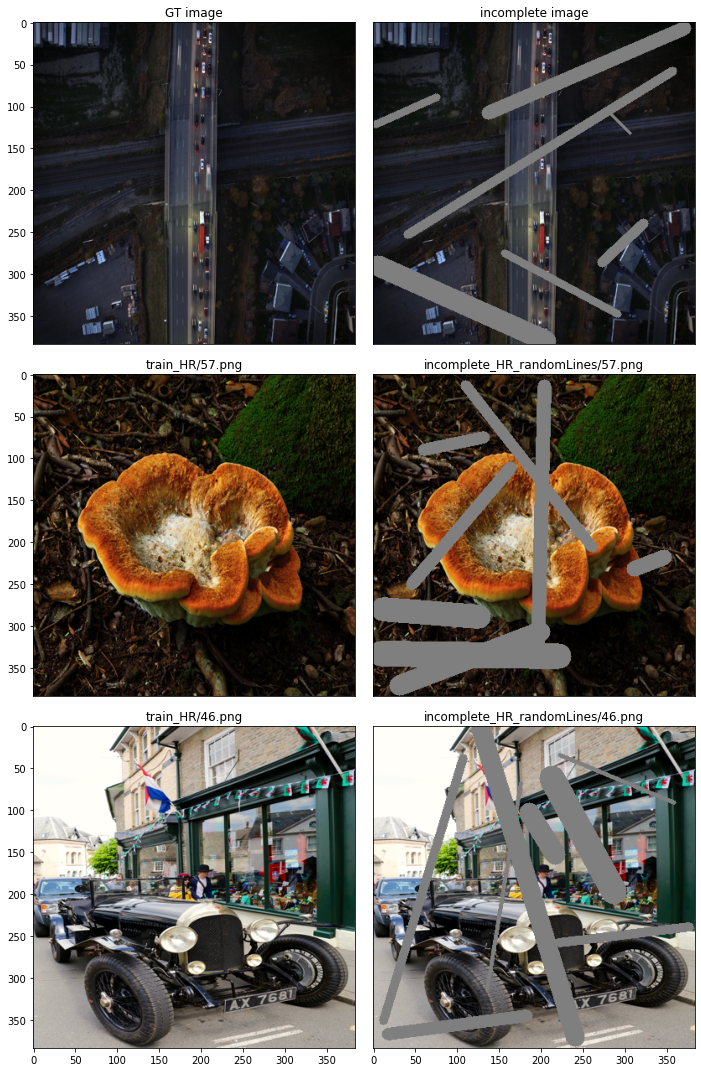

In [27]:
# inspect the dataset
inspect_data(HR_path = 'train_data/realistic_nature_100/train_HR/',
             LR_path = 'train_data/realistic_nature_100/incomplete_HR_randomLines/',
             type_end = '.png',
             sample_images = 3)

In [2]:
# arguments class for SRGAN model to make setting the parameters easier
class Args:
    '''
    arguments class for the model
    '''
    LR_path ='train_data/realistic_nature_100/incomplete_HR_fixed/'
    GT_path = 'train_data/realistic_nature_100/train_HR/'
    res_num = 16
    num_workers = 0
    batch_size = 16
    L2_coeff = 1.0
    adv_coeff = 1e-3
    tv_loss_coeff = 0.0
    pre_train_epoch = 100
    fine_train_epoch = 400
    scale = 1
    patch_size = 96
    feat_layer = 'relu5_4'
    vgg_rescale_coeff = 0.006
    fine_tuning = False
    in_memory = True
    generator_path = ''
    mode = 'train'
    save_each = 0
    print_progress_interval = 0
    progress_bar = True
    save_result_images = True
    result_images_marker = ''

In [5]:
## train the model
# create an instance of the arguments class and set the parameters for training
args = Args()

args.mode = 'train'
args.LR_path = 'train_data/realistic_nature_100/incomplete_HR_fixed/'
args.GT_path = 'train_data/realistic_nature_100/train_HR/'
args.scale = 1
args.patch_size = 96
args.batch_size = 16

args.pre_train_epoch = 100
args.fine_train_epoch = 300
args.save_each = 50

# preTrain_loss_g, fineTuneTrain_loss_g, fineTuneTrain_loss_d = train(args)
train(args)

pre_training (training generator):   2%|▏         | 2/100 [00:54<44:22, 27.16s/it]

KeyboardInterrupt: 

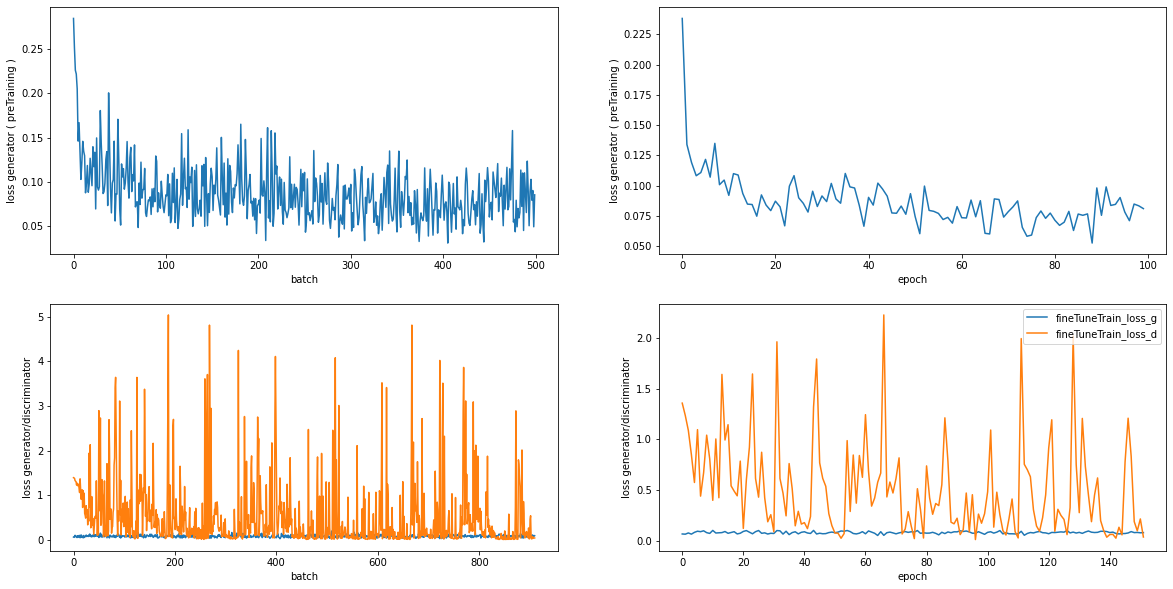

In [35]:
# plot the loss of the generator and discriminator over the training process for the pre-training and fine-tuning
# the loss is saved in a csv files in the progress_measurements folder (per batch and per epoch)

df = pd.read_csv('progress_measurements/progress_measurements_backup/bacth_preTrain_generator_loss.csv')
bacth_preTrain_loss_g = df['loss_generator'].to_numpy(dtype=np.float32).flatten()

df = pd.read_csv('progress_measurements/progress_measurements_backup/bacth_fineTrain_g_d_loss.csv')
bacth_fineTuneTrain_loss_g = df['loss_generator'].to_numpy(dtype=np.float32).flatten() 
bacth_fineTuneTrain_loss_d = df['loss_discriminator'].to_numpy(dtype=np.float32).flatten()

df = pd.read_csv('progress_measurements/progress_measurements_backup/epoch_preTrain_generator_loss.csv')
epoch_preTrain_loss_g = df['loss_generator'].to_numpy(dtype=np.float32).flatten()

# df = pd.read_csv('progress_measurements/progress_measurements_backup/epoch_fineTrain_g_d_loss.csv')
batch_per_epoch = len(bacth_fineTuneTrain_loss_g)//150
df = pd.DataFrame()
df['loss_generator'] = [np.mean(bacth_fineTuneTrain_loss_g[i:i+batch_per_epoch-1]) for i in range(0,len(bacth_fineTuneTrain_loss_g),batch_per_epoch)]
df['loss_discriminator'] = [np.mean(bacth_fineTuneTrain_loss_d[i:i+batch_per_epoch-1]) for i in range(0,len(bacth_fineTuneTrain_loss_d),batch_per_epoch)]
epoch_fineTuneTrain_loss_g = df['loss_generator'].to_numpy(dtype=np.float32).flatten() 
epoch_fineTuneTrain_loss_d = df['loss_discriminator'].to_numpy(dtype=np.float32).flatten() 


fig , axes = plt.subplots(2,2,figsize=(20,10))
# fig , axes = plt.subplots(2,2,figsize=(20,10))


axes[0,0].plot(bacth_preTrain_loss_g, label='preTrain_loss_g')
axes[0,0].set_xlabel('batch')
axes[0,0].set_ylabel('loss generator ( preTraining )')

axes[0,1].plot(epoch_preTrain_loss_g, label='preTrain_loss_g')
axes[0,1].set_xlabel('epoch')
axes[0,1].set_ylabel('loss generator ( preTraining )')

axes[1,0].plot(bacth_fineTuneTrain_loss_g, label='fineTuneTrain_loss_g')
axes[1,0].plot(bacth_fineTuneTrain_loss_d, label='fineTuneTrain_loss_d')
axes[1,0].set_xlabel('batch')
axes[1,0].set_ylabel('loss generator/discriminator')

axes[1,1].plot(epoch_fineTuneTrain_loss_g, label='fineTuneTrain_loss_g')
axes[1,1].plot(epoch_fineTuneTrain_loss_d, label='fineTuneTrain_loss_d')
axes[1,1].set_xlabel('epoch')
axes[1,1].set_ylabel('loss generator/discriminator')

plt.legend()
plt.show()

In [30]:
# the indecies of the images to compare over different models throught out the testing process
IMAGES_TO_COMPARE_INDECIES = [0,3,5]

In [7]:
# test the model after 2 epoches of pretraining and fintuning, for later comparison 
args = Args()

args.mode = 'test'
args.LR_path = 'test_data/realistic_nature_100/incomplete_HR_fixed/'
args.GT_path = 'test_data/realistic_nature_100/test_HR/'
# the fine-tuned model of only 2_epoches
args.generator_path = 'model/SRGAN_gene_150.pt'
args.result_images_marker = 'inpainting_fixed_150'

psnr_results_fixed , psnr_mean_fixed = test(args)

test (generating HR images): 10it [00:27,  2.74s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


low resolution images : 
shapes :  [[384 384   3]]
all_of_same_shape :  True
high resolution images : 
shapes :  [[384 384   3]]
all_of_same_shape :  True
result images : 
shapes :  [[384 384   3]]
all_of_same_shape :  True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


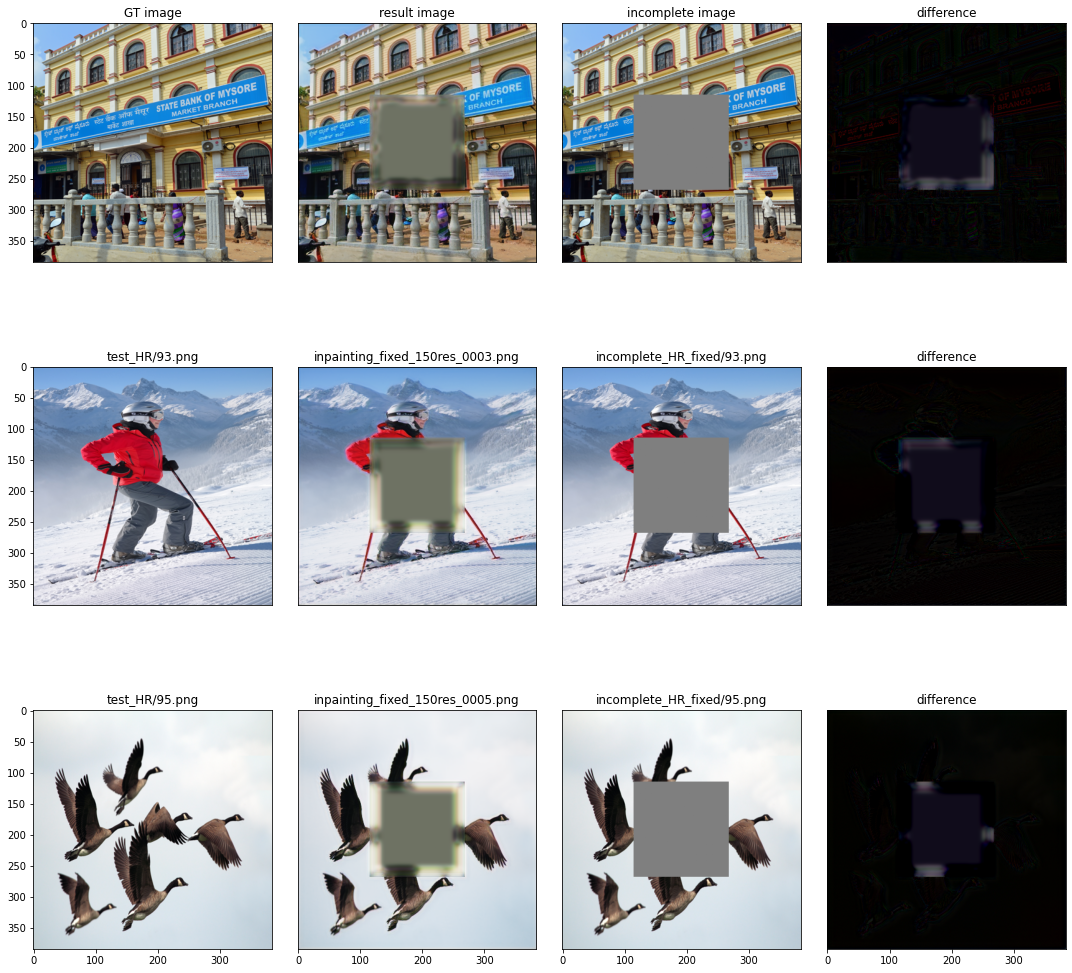

In [32]:
# plot the test and result images ( for the fine-tuned model of only 2_epoches )
inspect_data(HR_path ='test_data/realistic_nature_100/test_HR/',
             LR_path ='test_data/realistic_nature_100/incomplete_HR_fixed/',
             result_path='result_images/',
             type_end ='.png',
             result_imgs_prefix='inpainting_fixed',
             imgs_indecies=IMAGES_TO_COMPARE_INDECIES)

PSNR mean of fixed squer :  22.262223057511655


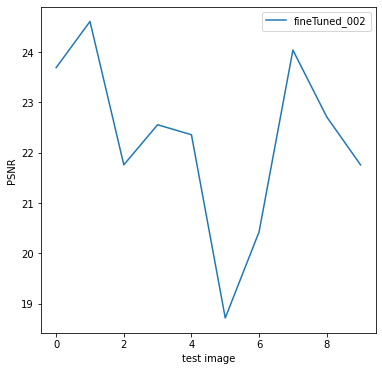

In [33]:
# plot the PSNR of the test images
print('PSNR mean of fixed squer : ', psnr_mean_fixed)

fig , ax = plt.subplots(figsize=(6,6))
ax.plot(psnr_results_fixed, label='fineTuned_002')
ax.set_xlabel('test image')
ax.set_ylabel('PSNR')
plt.legend()
plt.show()

In [ ]:
## train the model
# create an instance of the arguments class and set the parameters for training
args = Args()

args.mode = 'train'
args.LR_path = 'train_data/realistic_nature_100/incomplete_HR_randomLines/'
args.GT_path = 'train_data/realistic_nature_100/train_HR/'
args.scale = 1
args.patch_size = 96
args.batch_size = 16

args.pre_train_epoch = 100
args.fine_train_epoch = 300
args.save_each = 50

# preTrain_loss_g, fineTuneTrain_loss_g, fineTuneTrain_loss_d = train(args)
train(args)

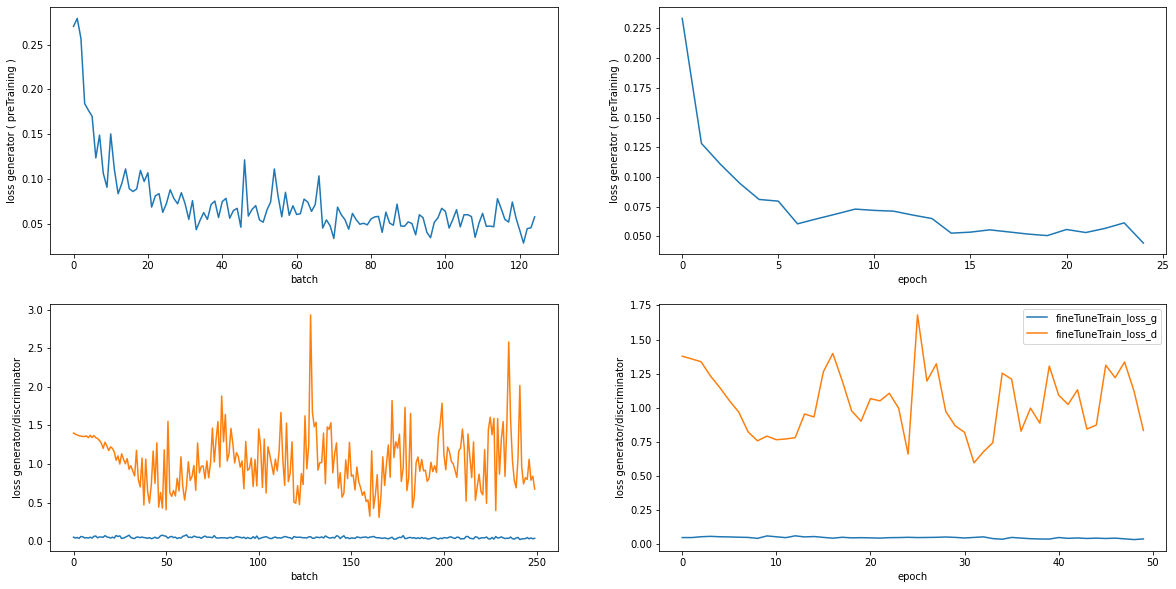

In [36]:
# plot the loss of the generator and discriminator over the training process for the pre-training and fine-tuning
# the loss is saved in a csv files in the progress_measurements folder (per batch and per epoch)

df = pd.read_csv('progress_measurements/bacth_preTrain_generator_loss.csv')
bacth_preTrain_loss_g = df['loss_generator'].to_numpy(dtype=np.float32).flatten()

df = pd.read_csv('progress_measurements/bacth_fineTrain_g_d_loss.csv')
bacth_fineTuneTrain_loss_g = df['loss_generator'].to_numpy(dtype=np.float32).flatten() 
bacth_fineTuneTrain_loss_d = df['loss_discriminator'].to_numpy(dtype=np.float32).flatten()

df = pd.read_csv('progress_measurements/epoch_preTrain_generator_loss.csv')
epoch_preTrain_loss_g = df['loss_generator'].to_numpy(dtype=np.float32).flatten()

df = pd.read_csv('progress_measurements/epoch_fineTrain_g_d_loss.csv')
# batch_per_epoch = len(bacth_fineTuneTrain_loss_g)//150
# df = pd.DataFrame()
# df['loss_generator'] = [np.mean(bacth_fineTuneTrain_loss_g[i:i+batch_per_epoch-1]) for i in range(0,len(bacth_fineTuneTrain_loss_g),batch_per_epoch)]
# df['loss_discriminator'] = [np.mean(bacth_fineTuneTrain_loss_d[i:i+batch_per_epoch-1]) for i in range(0,len(bacth_fineTuneTrain_loss_d),batch_per_epoch)]
epoch_fineTuneTrain_loss_g = df['loss_generator'].to_numpy(dtype=np.float32).flatten() 
epoch_fineTuneTrain_loss_d = df['loss_discriminator'].to_numpy(dtype=np.float32).flatten() 


fig , axes = plt.subplots(2,2,figsize=(20,10))
# fig , axes = plt.subplots(2,2,figsize=(20,10))


axes[0,0].plot(bacth_preTrain_loss_g, label='preTrain_loss_g')
axes[0,0].set_xlabel('batch')
axes[0,0].set_ylabel('loss generator ( preTraining )')

axes[0,1].plot(epoch_preTrain_loss_g, label='preTrain_loss_g')
axes[0,1].set_xlabel('epoch')
axes[0,1].set_ylabel('loss generator ( preTraining )')

axes[1,0].plot(bacth_fineTuneTrain_loss_g, label='fineTuneTrain_loss_g')
axes[1,0].plot(bacth_fineTuneTrain_loss_d, label='fineTuneTrain_loss_d')
axes[1,0].set_xlabel('batch')
axes[1,0].set_ylabel('loss generator/discriminator')

axes[1,1].plot(epoch_fineTuneTrain_loss_g, label='fineTuneTrain_loss_g')
axes[1,1].plot(epoch_fineTuneTrain_loss_d, label='fineTuneTrain_loss_d')
axes[1,1].set_xlabel('epoch')
axes[1,1].set_ylabel('loss generator/discriminator')

plt.legend()
plt.show()

In [5]:
# test the model after 2 epoches of pretraining and fintuning, for later comparison 
args = Args()

args.mode = 'test'
args.LR_path = 'test_data/realistic_nature_100/incomplete_HR_randomLines/'
args.GT_path = 'test_data/realistic_nature_100/test_HR/'
# the fine-tuned model of only 2_epoches
args.generator_path = 'model/SRGAN_gene_050.pt'
args.result_images_marker = 'inpainting_randomLines_50_'

psnr_results_randomLines , psnr_mean_randomLines = test(args)

test (generating HR images): 10it [00:30,  3.07s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


low resolution images : 
shapes :  [[384 384   3]]
all_of_same_shape :  True
high resolution images : 
shapes :  [[384 384   3]]
all_of_same_shape :  True
result images : 
shapes :  [[384 384   3]]
all_of_same_shape :  True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


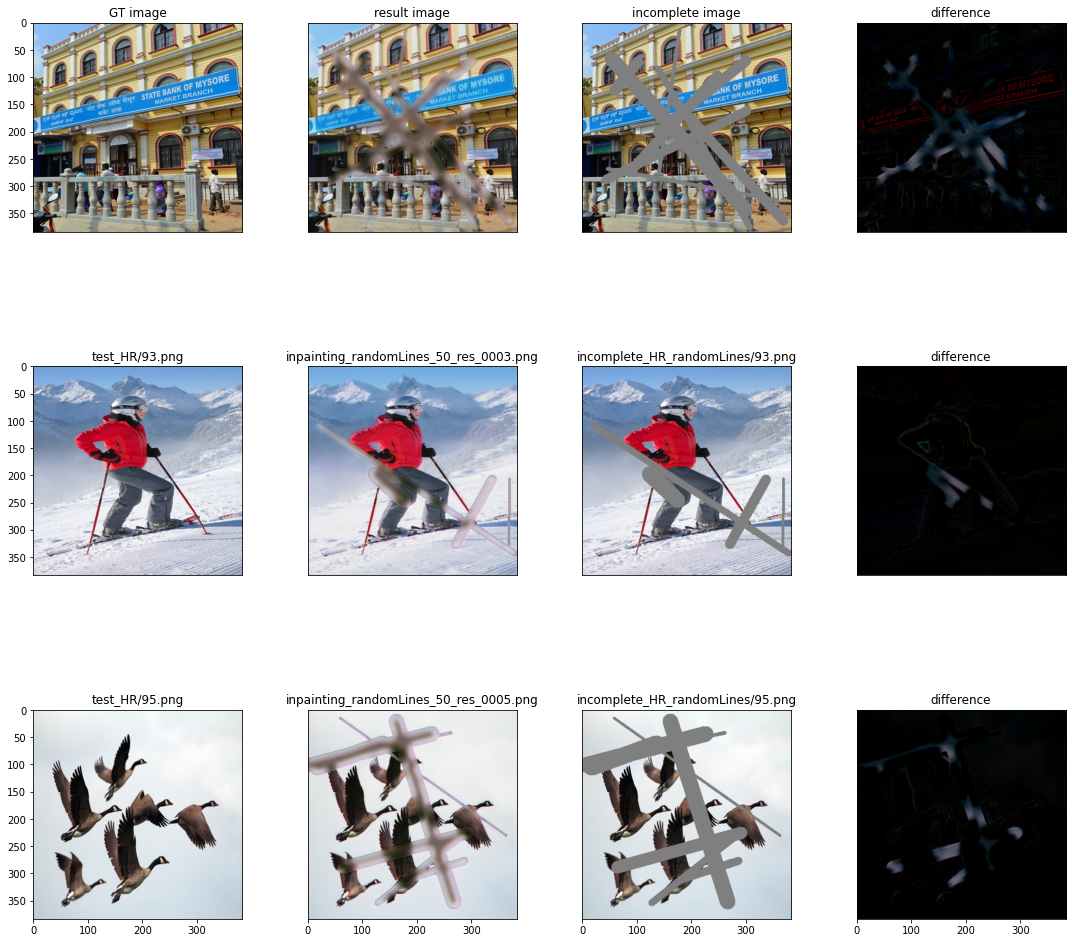

In [39]:
# plot the test and result images ( for the fine-tuned model of only 2_epoches )
inspect_data(HR_path ='test_data/realistic_nature_100/test_HR/',
             LR_path ='test_data/realistic_nature_100/incomplete_HR_randomLines/',
             result_path='result_images/',
             type_end ='.png',
             result_imgs_prefix='inpainting_randomLines',
             imgs_indecies=IMAGES_TO_COMPARE_INDECIES)

PSNR mean trained on randomLines:  24.249166173542754


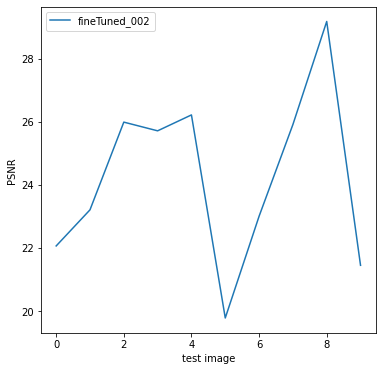

In [40]:
# plot the PSNR of the test images
print('PSNR mean trained on randomLines: ', psnr_mean_randomLines)

fig , ax = plt.subplots(figsize=(6,6))
ax.plot(psnr_results_randomLines, label='fineTuned_002')
ax.set_xlabel('test image')
ax.set_ylabel('PSNR')
plt.legend()
plt.show()

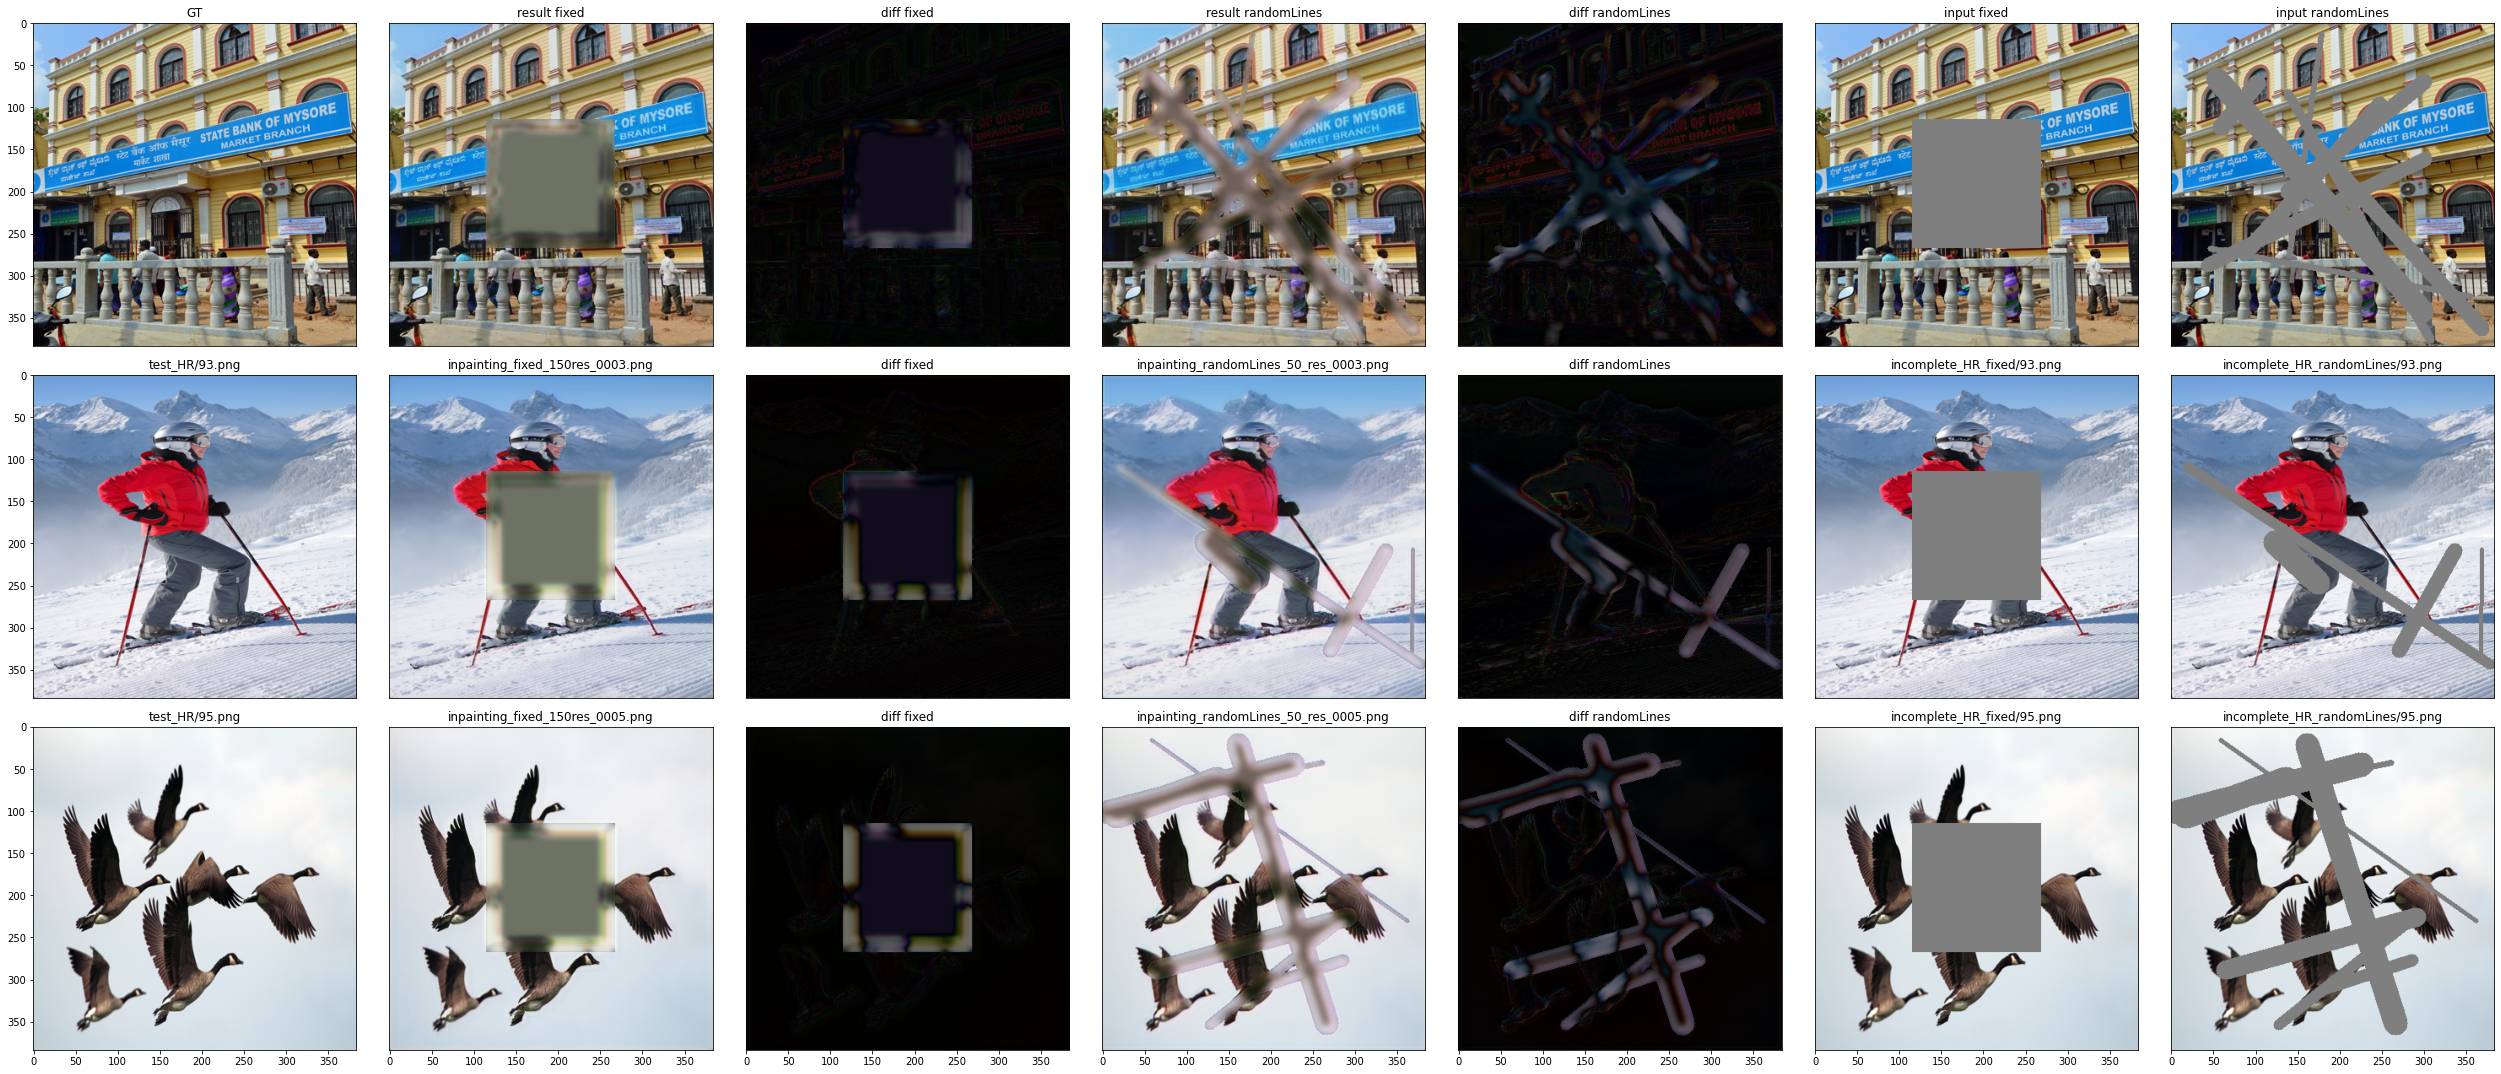

In [44]:
# compare the results of all models together
# IMAGES_TO_COMPARE_INDECIES = [4,7,9]

fig_scale = 5
models_numb = 2
comparision_data_numb = 3

GT_path = 'test_data/realistic_nature_100/test_HR/'
# incomplet_path = 'test_data/realistic_nature_100/incomplete_HR/'
incomplet_fixed_path = 'test_data/realistic_nature_100/incomplete_HR_fixed/'
incomplet_randomLines_path = 'test_data/realistic_nature_100/incomplete_HR_randomLines/'

result_path = 'result_images/'

type_end = '.png'
GT_imgs_prefix = ''
# incomplete_imgs_prefix = ''
incomplete_fixed_imgs_prefix = ''
incomplete_randomLines_imgs_prefix = ''

directory_GT = os.fsencode(GT_path)
directory_fixed = os.fsencode(incomplet_fixed_path)
directory_randomeLines = os.fsencode(incomplet_randomLines_path)


files_GT = os.listdir(directory_GT)
files_fixed = os.listdir(directory_fixed)
files_randomLines = os.listdir(directory_randomeLines)

files_GT = [os.fsdecode(file) for file in files_GT if os.fsdecode(file).endswith(type_end) 
                                                    and os.fsdecode(file).startswith(GT_imgs_prefix)]
files_fixed = [os.fsdecode(file) for file in files_fixed if os.fsdecode(file).endswith(type_end) 
                                                    and os.fsdecode(file).startswith(incomplete_fixed_imgs_prefix)]
files_randomLines = [os.fsdecode(file) for file in files_randomLines if os.fsdecode(file).endswith(type_end)
                                                    and os.fsdecode(file).startswith(incomplete_randomLines_imgs_prefix)]

files_GT.sort()
files_fixed.sort()
files_randomLines.sort()

directory_result = os.fsencode(result_path)
files_result = os.listdir(directory_result)
files_result.sort()

result_imgs_prefix_gene_150_fixed = 'inpainting_fixed'
files_result_gene_150_fixed = [os.fsdecode(file) for file in files_result if os.fsdecode(file).endswith(type_end) 
                                                    and os.fsdecode(file).startswith(result_imgs_prefix_gene_150_fixed)]

result_imgs_prefix_gene_50_randomLines = 'inpainting_randomLines'
files_result_gene_50_randomLines = [os.fsdecode(file) for file in files_result if os.fsdecode(file).endswith(type_end) 
                                                    and os.fsdecode(file).startswith(result_imgs_prefix_gene_50_randomLines)]

row = len(IMAGES_TO_COMPARE_INDECIES)
col = (models_numb*2)+comparision_data_numb
fig , axes = plt.subplots(nrows=row, ncols=col,
                          figsize=(fig_scale*col,fig_scale*row))

for idx, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) in enumerate(axes):
    img_GT_name = files_GT[IMAGES_TO_COMPARE_INDECIES[idx]]
    img_fixed_name = files_fixed[IMAGES_TO_COMPARE_INDECIES[idx]]
    img_randomLines_name = files_randomLines[IMAGES_TO_COMPARE_INDECIES[idx]]

    img_GT_title = os.path.basename(os.path.normpath(GT_path)) + '/' + img_GT_name
    img_fixed_title = os.path.basename(os.path.normpath(incomplet_fixed_path)) + '/' + img_fixed_name
    img_randomLines_title = os.path.basename(os.path.normpath(incomplet_randomLines_path)) + '/' + img_randomLines_name


    img_result_name_gene_150_fixed            = files_result_gene_150_fixed[IMAGES_TO_COMPARE_INDECIES[idx]]
    img_result_name_gene_50_randomLines       = files_result_gene_50_randomLines[IMAGES_TO_COMPARE_INDECIES[idx]]

    img_GT = plt.imread(GT_path+img_GT_name)
    img_fixed = plt.imread(incomplet_fixed_path+img_fixed_name)
    img_randomLines = plt.imread(incomplet_randomLines_path+img_randomLines_name)

    img_result_gene_150_fixed        = plt.imread(result_path+img_result_name_gene_150_fixed)
    img_result_gene_50_randomLines    = plt.imread(result_path+img_result_name_gene_50_randomLines)
    
    img_diff_fixed = np.abs(img_result_gene_150_fixed-img_fixed)
    img_diff_randomLines = np.abs(img_result_gene_50_randomLines-img_randomLines)

    ax1.imshow(img_GT)
    ax1.set_title(img_GT_title)
    ax1.xaxis.set_visible(False)
    ax1.yaxis.set_visible(True)

    ax2.imshow(img_result_gene_150_fixed)
    ax2.set_title(img_result_name_gene_150_fixed)
    ax2.xaxis.set_visible(False)
    ax2.yaxis.set_visible(False)

    ax3.imshow(img_diff_fixed)
    ax3.set_title('diff fixed')
    ax3.xaxis.set_visible(False)
    ax3.yaxis.set_visible(False)

    ax4.imshow(img_result_gene_50_randomLines)
    ax4.set_title(img_result_name_gene_50_randomLines)
    ax4.xaxis.set_visible(False)
    ax4.yaxis.set_visible(False)

    ax5.imshow(img_diff_randomLines)
    ax5.set_title('diff randomLines')
    ax5.xaxis.set_visible(False)
    ax5.yaxis.set_visible(False)

    ax6.imshow(img_fixed)
    ax6.set_title(img_fixed_title)
    ax6.xaxis.set_visible(False)
    ax6.yaxis.set_visible(False)

    ax7.imshow(img_randomLines)
    ax7.set_title(img_randomLines_title)
    ax7.xaxis.set_visible(False)
    ax7.yaxis.set_visible(False)

    if idx == len(IMAGES_TO_COMPARE_INDECIES)-1:
        ax1.xaxis.set_visible(True)
        ax2.xaxis.set_visible(True)
        ax3.xaxis.set_visible(True)
        ax4.xaxis.set_visible(True)
        ax5.xaxis.set_visible(True)
        ax6.xaxis.set_visible(True)
        ax7.xaxis.set_visible(True)
    if idx == 0:
        ax1.set_title('GT')
        ax2.set_title('result fixed')
        ax3.set_title('diff fixed')
        ax4.set_title('result randomLines')
        ax5.set_title('diff randomLines')
        ax6.set_title('input fixed')
        ax7.set_title('input randomLines')


plt.tight_layout()
plt.show()

PSNR mean trained on randomLines:  24.249166173542754
PSNR mean trained on fixed:  22.262223057511655


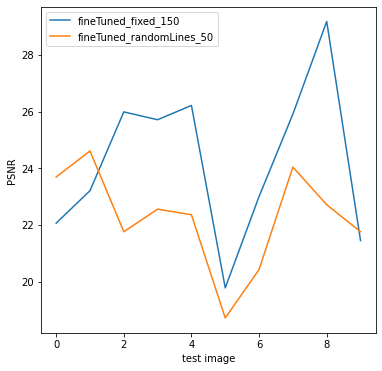

In [8]:
# plot the PSNR of the test images
print('PSNR mean trained on randomLines: ', psnr_mean_randomLines)
print('PSNR mean trained on fixed: ', psnr_mean_fixed)

fig , ax = plt.subplots(figsize=(6,6))
ax.plot(psnr_results_randomLines, label='fineTuned_fixed_150')
ax.plot(psnr_results_fixed, label='fineTuned_randomLines_50')
ax.set_xlabel('test image')
ax.set_ylabel('PSNR')
plt.legend()
plt.show()